In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pybinding as pb
from pybinding.repository import graphene

In [16]:
from tqdm import tqdm

In [7]:
# Basis Vectors
a1 = graphene.a * np.array([1, np.sqrt(3)])/2
a2 = graphene.a * np.array([-1, np.sqrt(3)])/2
a3 = graphene.a * np.array([1, 0])

at = graphene.a/np.sqrt(3) # Distance between A and B sublattices

# Here we model the defect as a gaussian potential
# We can specify whether its at sublattice points or inbetween
# Duterix 2019 Defect is on sublattice A

def pv(x, y):
  return -3*np.exp(-((1)*x**2+(1)*(y-at)**2)/(at)**2)

def defect():
  @pb.onsite_energy_modifier
  def potential(x, y):
    #return -3*np.exp(-(x**2+(y-at/2)**2)/(at)**2)
    return pv(x, y)

  return potential

# Create tightbinding model
model = pb.Model(graphene.monolayer(), pb.rectangle(50, 50), defect())

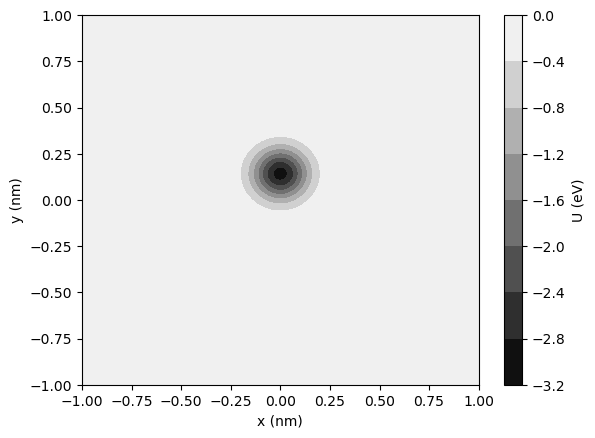

In [14]:
# Plotting defect potential
fig1, ax1 = plt.subplots()

x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)

xx, yy = np.meshgrid(x, y)
zz = pv(xx, yy)

ax1.set_xlabel("x (nm)")
ax1.set_ylabel("y (nm)")

h = ax1.contourf(xx, yy, zz, cmap='gray')
fig1.colorbar(h,  label="U (eV)")

<a list of 0 AxesImage objects>
no


(-5.0, 5.0)

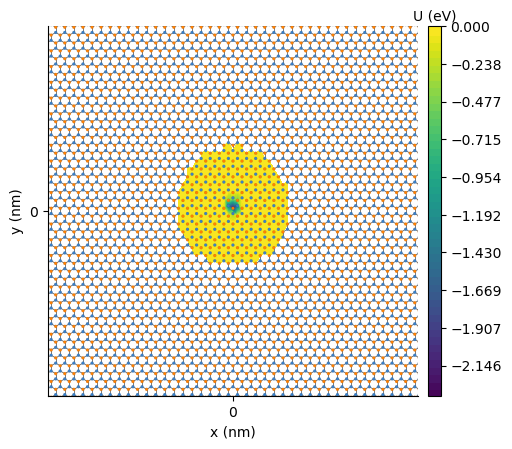

In [9]:
model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model.plot()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [10]:
# Discrete Spatial LDOS

kpm = pb.kpm(model)
size = 20 # half of lateral size
energies = np.array([0.3]) # eV

spatial_ldos = kpm.calc_spatial_ldos(np.linspace(-3, 3, 100),
                                     broadening=0.1, #eV
                                     shape=pb.rectangle(size*2))

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:03:16 / ETA: 0:00:00


(-5.0, 5.0)

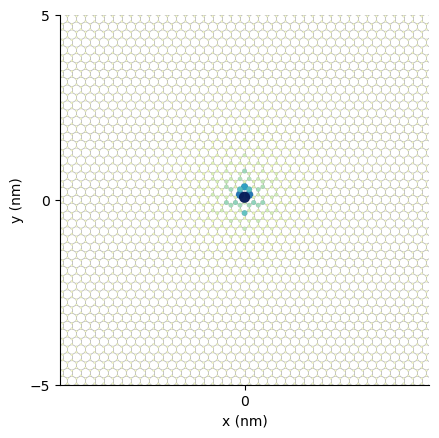

In [12]:
fig2, ax2 = plt.subplots()

smap = spatial_ldos.structure_map(energies[0])
smap.plot(site_radius=(0.02, 0.15))
#ax2.set_xlim(-size, size)
#ax2.set_ylim(-size, size)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

In [17]:
(X, Y, Z) = smap.spatial_map.positions
psi2 = smap.data

mesh_size = 1000
x, y = np.meshgrid(np.linspace(-size, size, mesh_size),
                   np.linspace(-size, size, mesh_size))
z = x*0

# Interpolate by gaussian
# Every site impacts the points like a gaussian
# See Slater-Koster tightbinding for graphene band structure
for (X, Y, psi2) in tqdm(zip(X, Y, psi2)):
  z += psi2*np.exp(-((x-X)**2+(y-Y)**2)/(at)**2)

z_min, z_max = 0, np.abs(z).max()

51563it [25:12, 34.08it/s]


KeyboardInterrupt: 